<a href="https://colab.research.google.com/github/abhishek-marathe04/learning-pytorch/blob/main/02_pytorch_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is extension to classification notebook.

## 8. Putting it all together with a multi-class classification problem

* Binary classification = one thing or another (cat vs. dog, spam vs. not spam, fraud or not fraud)
* Multi-class classification = more than one thing or another (cat vs. dog vs. chicken)

In [45]:
import torch
import matplotlib.pyplot as plt

### 8.1 Creating a toy multi-class dataset

In [46]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the Hyperparameters
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            centers=NUM_CLASSES,
                            n_features=NUM_FEATURES,
                            cluster_std=1.5,
                  random_state=RANDOM_SEED)

# 2. Turn data into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=42)

# 4. Visualise data


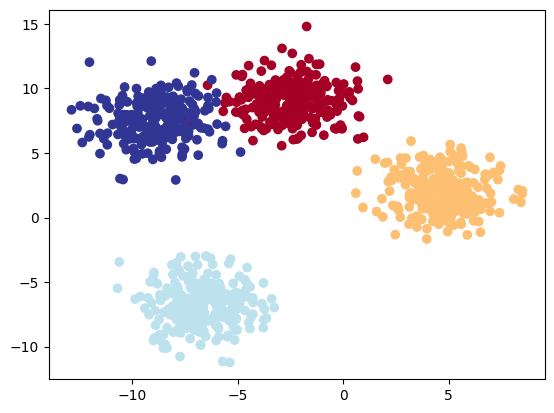

In [47]:
plt.scatter(X_blob[:,0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [48]:

# Import PyTorch and nn
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [49]:
from torch import nn

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units) -> None:
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
    )

  def forward(self, x: torch.tensor) -> torch.tensor :
    return self.linear_layer_stack(x)

In [50]:
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

In [51]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [52]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [53]:
# Loss function
loss_fn = nn.CrossEntropyLoss()

# Create an optimiser
optimiser = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test our model, we need to convert our model's outputs (logtis) to predicition probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probabilities)

In [54]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.1206,  0.4587,  0.0671, -0.2196],
        [-0.0268,  1.6610,  1.1507, -0.6926],
        [-0.7201,  0.4839,  0.5468, -0.0286],
        [ 0.0408,  0.4081,  0.0641, -0.1460],
        [ 0.4396,  1.2319,  0.6636, -0.1354],
        [-0.0970,  1.9410,  1.3719, -0.7827],
        [-0.2575,  0.3578,  0.4423,  0.1536],
        [ 0.5111,  1.2992,  0.7286, -0.2315],
        [-0.9252,  0.8002,  0.6346, -0.1880],
        [ 0.5389,  1.2620,  0.6715, -0.1556]])

In [55]:
y_pred_probs = torch.softmax(y_logits, 1)

In [56]:
y_pred_probs[0]

tensor([0.2042, 0.3645, 0.2464, 0.1850])

In [57]:
torch.sum(y_pred_probs[0])

tensor(1.)

In [58]:
torch.argmax(y_pred_probs[0])# This will give position, 0 Means, model thinks this belongs to 0th Class

tensor(1)

In [59]:
torch.argmax(y_pred_probs[140])

tensor(1)

In [60]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
        1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
        2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

In [62]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

### 8.5 Creating a training loop and testing loop for a multi-class PyTorch model

In [63]:
epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

    # Train
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train)

    # 2.Calculate the loss
    loss = loss_fn(y_logits, y_blob_train.long())

    y_pred_probs = torch.softmax(y_logits, 1)
    y_preds = torch.argmax(y_pred_probs, dim=1)

    # print(y_logits)
    # print(y_logits.dtype)


    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_preds)

    # 3. Zero grad
    optimiser.zero_grad()

    # 4. Backpropogation
    loss.backward()

    # 5. Update parameters
    optimiser.step()



    # Put model in evaluation mode and setup inference context
    with torch.inference_mode():

        # 1. Forward pass
        y_logits_test = model_4(X_blob_test)
        y_pred_probs_test = torch.softmax(y_logits_test, 1)
        y_preds_test = torch.argmax(y_pred_probs_test, dim=1)


        # print(y_preds_test.shape)
        # 2. Calculate test loss
        test_loss = loss_fn(y_logits_test, y_blob_test.long())
        test_acc = accuracy_fn(y_blob_test, y_preds_test)

        ### Perform testing every 20 epochs
        if epoch % 10 == 0:
        # Print out what's happening
          print(f"Epoch: {epoch} \n | Train loss: {loss:.3f} Train accuracy: {acc} \n | Test loss: {test_loss:.3f} | Test accuracy: {test_acc}")


Epoch: 0 
 | Train loss: 1.715 Train accuracy: 38.125 
 | Test loss: 0.970 | Test accuracy: 95.0
Epoch: 10 
 | Train loss: 0.418 Train accuracy: 98.625 
 | Test loss: 0.351 | Test accuracy: 99.0
Epoch: 20 
 | Train loss: 0.271 Train accuracy: 98.875 
 | Test loss: 0.220 | Test accuracy: 99.0
Epoch: 30 
 | Train loss: 0.179 Train accuracy: 99.0 
 | Test loss: 0.143 | Test accuracy: 99.0
Epoch: 40 
 | Train loss: 0.112 Train accuracy: 99.125 
 | Test loss: 0.089 | Test accuracy: 99.5
Epoch: 50 
 | Train loss: 0.075 Train accuracy: 99.25 
 | Test loss: 0.059 | Test accuracy: 99.5
Epoch: 60 
 | Train loss: 0.056 Train accuracy: 99.25 
 | Test loss: 0.044 | Test accuracy: 99.5
Epoch: 70 
 | Train loss: 0.046 Train accuracy: 99.25 
 | Test loss: 0.036 | Test accuracy: 99.5
Epoch: 80 
 | Train loss: 0.041 Train accuracy: 99.25 
 | Test loss: 0.031 | Test accuracy: 99.5
Epoch: 90 
 | Train loss: 0.037 Train accuracy: 99.25 
 | Test loss: 0.028 | Test accuracy: 99.5


In [64]:


import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

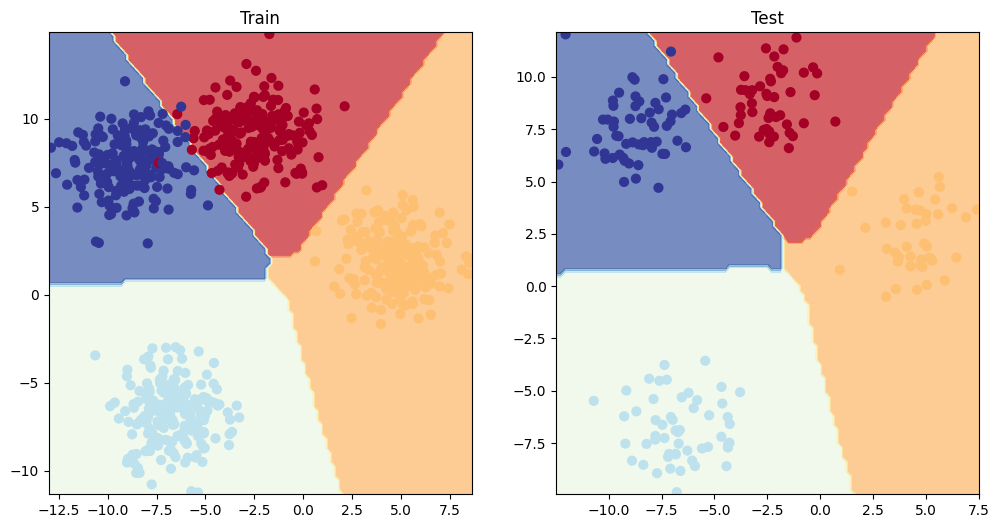

In [65]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)